# PREDICTING PRICE OF PRE-OWNED CARS 

project to develop an algorithm to predict the price of the cars based on various attributes associated with the car for Storm Motors.

Storm Motors is an e-commerce company who act as mediators between parties interested in selling and buying pre-owned cars

For the year 2015-2016, we have a recorded data about the seller and car including:
    1. Specification details
    2. condition of car
    3. seller details
    4. registration details
    5. web advertisement details
    6. make and model information 
    7. price

###### Created on Sun Jun 12 17:20:46 2022
###### @author: *Deendayal*

##### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Setting dimensions for plot 

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#### Reading CSV file and creating copy

In [3]:
cars_data=pd.read_csv('cars_sampled.csv' )

In [4]:
cars=cars_data.copy()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

### Summarizing data
Used pd to set format for float values to only 3 digits after decimal.

In [5]:
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


##### To display maximum set of columns
Setting max columns to display to analyse all data

In [6]:
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


#### Dropping unwanted columns

In [7]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

##### Removing duplicate records

In [8]:
cars.drop_duplicates(keep='first',inplace=True)


470 duplicate records

### Data cleaning

##### No. of missing values in each column

In [9]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

##### Variable yearOfRegistration

In [10]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()

In [11]:
sum(cars['yearOfRegistration'] > 2018)

26

In [12]:
sum(cars['yearOfRegistration'] < 1950)

38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

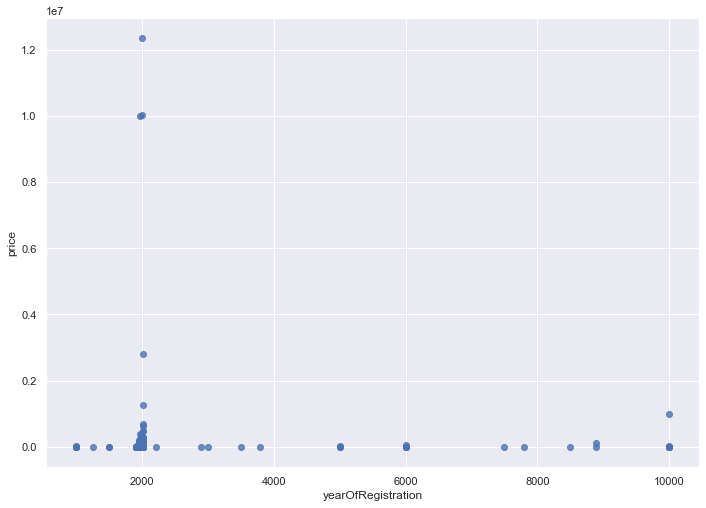

In [13]:
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)

Working range- 1950 and 2018

##### Variable price

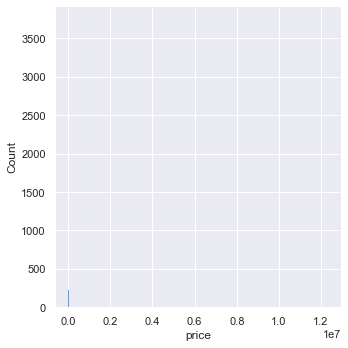

In [14]:
price_count=cars['price'].value_counts().sort_index()
sns.displot(cars['price'])

In [15]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

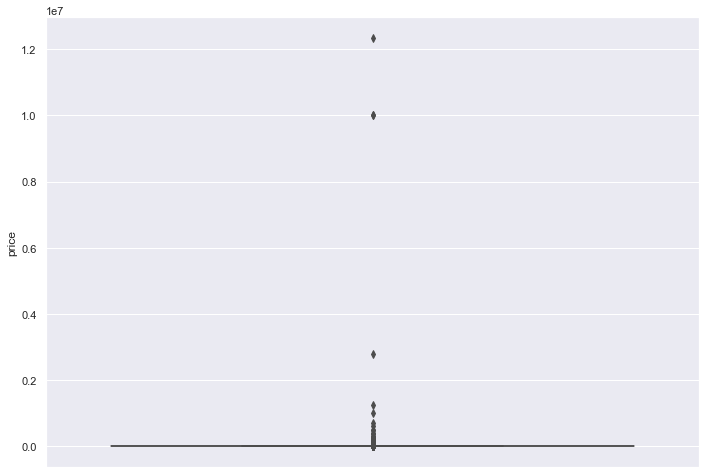

In [16]:
sns.boxplot(y=cars['price'])

In [17]:
sum(cars['price'] > 150000)

34

In [18]:
sum(cars['price'] < 100)

1748

Working range- 100 and 150000

##### Variable powerPS

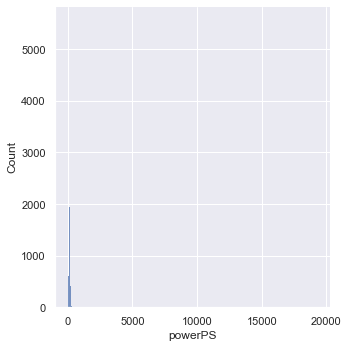

In [19]:
power_count=cars['powerPS'].value_counts().sort_index()
sns.displot(cars['powerPS'])

In [20]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='powerPS'>

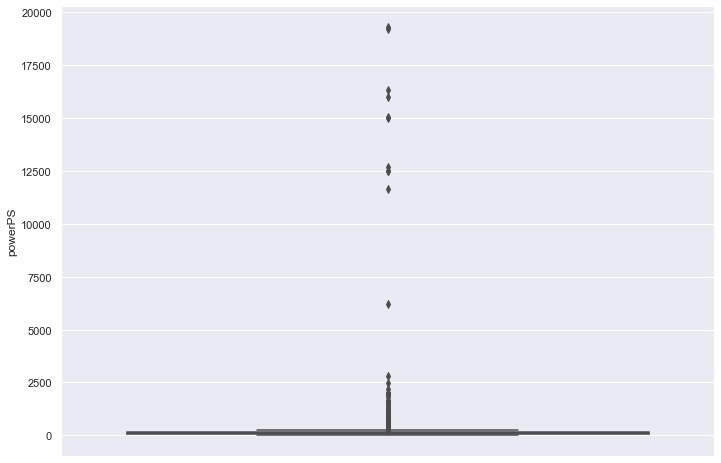

In [21]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

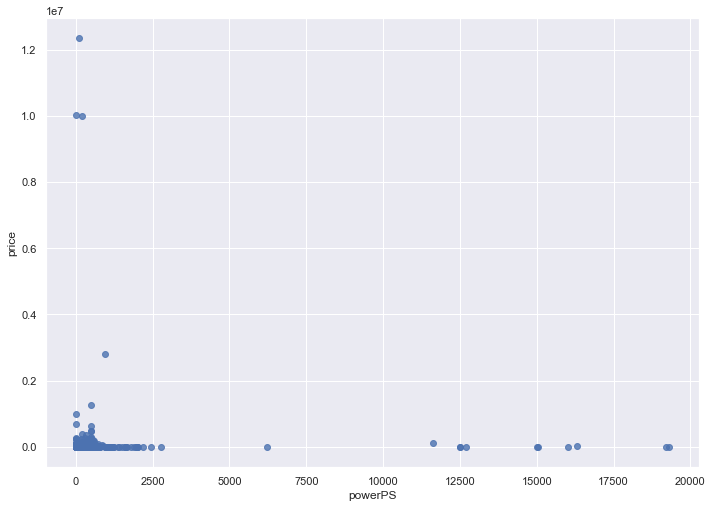

In [22]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [23]:
sum(cars['powerPS'] > 500)

115

In [24]:
sum(cars['powerPS'] < 10)

5565

Working range- 10 and 500

#### Working range of data

In [25]:
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]

~6700 records are dropped

Further to simplify- variable reduction
##### Combining yearOfRegistration and monthOfRegistration

In [26]:
cars['monthOfRegistration']/=12

##### Creating new varible Age by adding yearOfRegistration and monthOfRegistration
We are calculating age thats why we divided month by 12 because if month was integer it will effect our analysis, so dividing them to 12 make them perfect to add in age.
Using round function we round of the decimal value to two digits after decimal.

In [27]:
cars['Age']=(2022-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       18.873
std         7.093
min         4.000
25%        14.330
50%        18.830
75%        23.170
max        71.750
Name: Age, dtype: float64

##### Dropping yearOfRegistration and monthOfRegistration
After calculating the age the year and month of registration are not useful now so we are removing extra variables.

In [28]:
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

#### Visualizing parameters 

##### Age

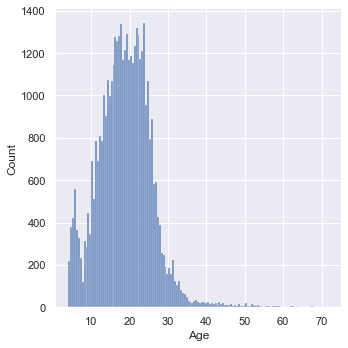

In [29]:
sns.displot(cars['Age'])

<AxesSubplot:ylabel='Age'>

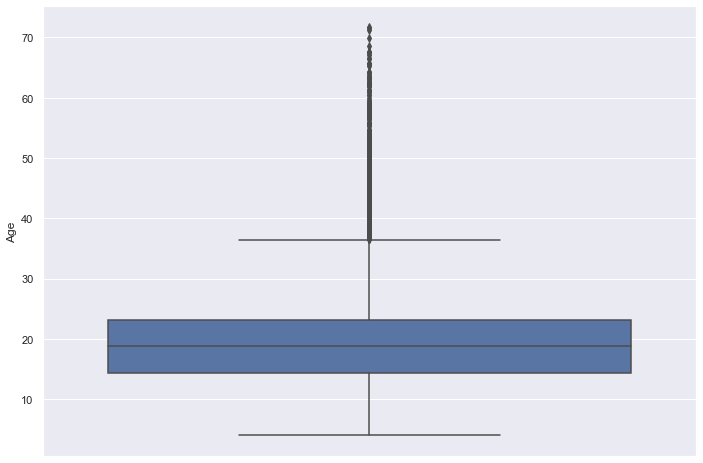

In [30]:
sns.boxplot(y=cars['Age'])

##### Price

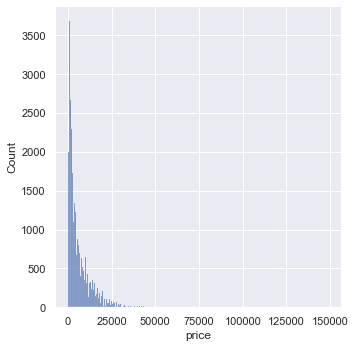

In [31]:
sns.displot(cars['price'])

<AxesSubplot:ylabel='price'>

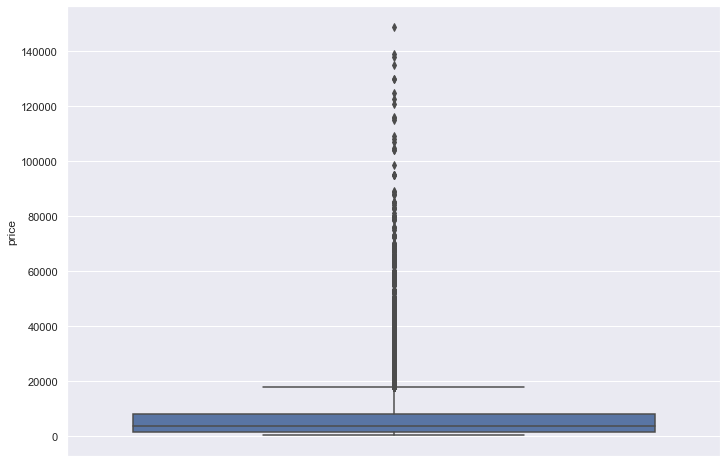

In [32]:
sns.boxplot(y=cars['price'])

##### powerPS

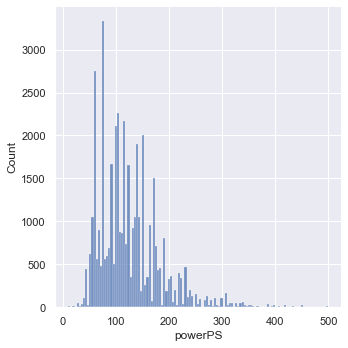

In [33]:
sns.displot(cars['powerPS'])

<AxesSubplot:ylabel='price'>

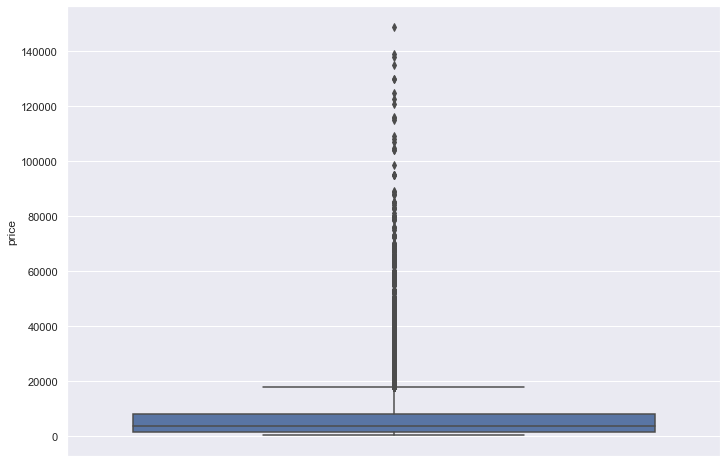

In [34]:
sns.boxplot(y=cars['price'])

#### Visualizing parameters after narrowing working range

##### Age vs price

<AxesSubplot:xlabel='Age', ylabel='price'>

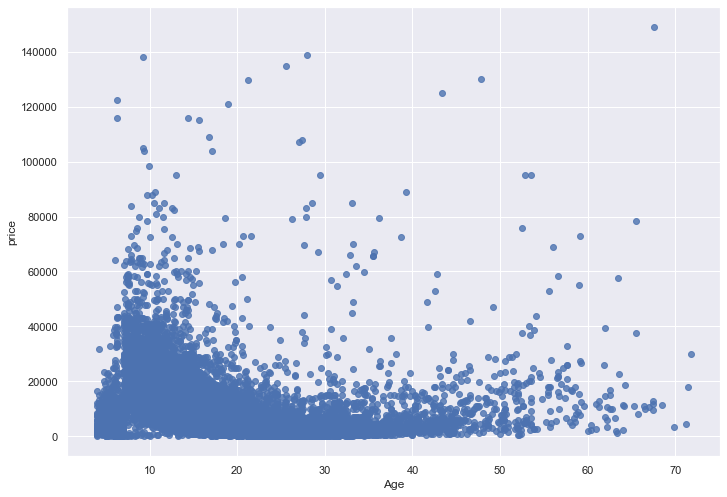

In [35]:
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)

Cars priced higher are newer
With increase in age, price decreases
However some cars are priced higher with increase in age

##### powerPS vs price

<AxesSubplot:xlabel='powerPS', ylabel='price'>

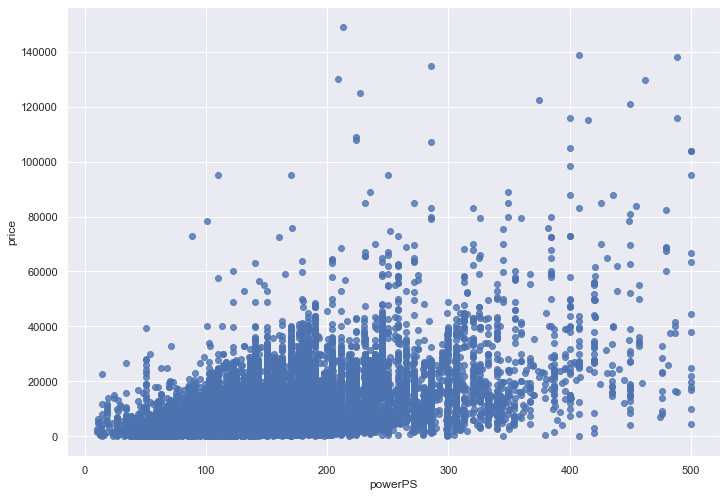

In [36]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

##### Variable seller

In [37]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [38]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


<AxesSubplot:xlabel='seller', ylabel='count'>

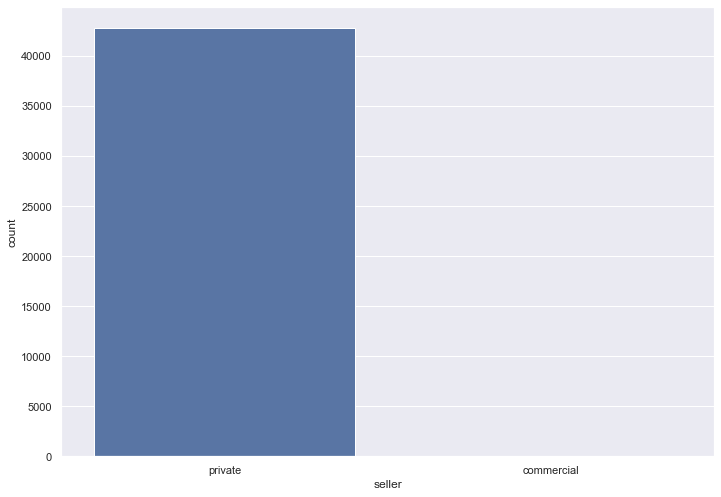

In [39]:
sns.countplot(x= 'seller',data=cars)

Fewer cars have 'commercial', so we can conclude that variable saller is Insignificant

##### Variable offerType

In [40]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

<AxesSubplot:xlabel='offerType', ylabel='count'>

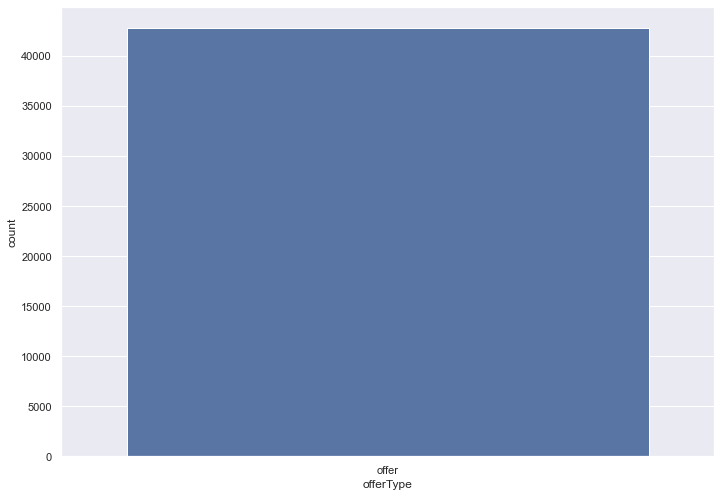

In [41]:
sns.countplot(x= 'offerType',data=cars)

All cars have 'offer', so this is also Insignificant

##### Variable abtest

In [42]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [43]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='count'>

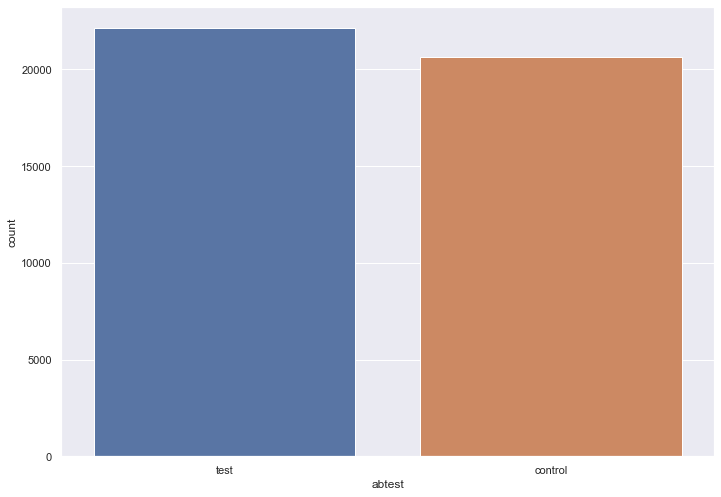

In [44]:
sns.countplot(x= 'abtest',data=cars)

Equally distributed

<AxesSubplot:xlabel='abtest', ylabel='price'>

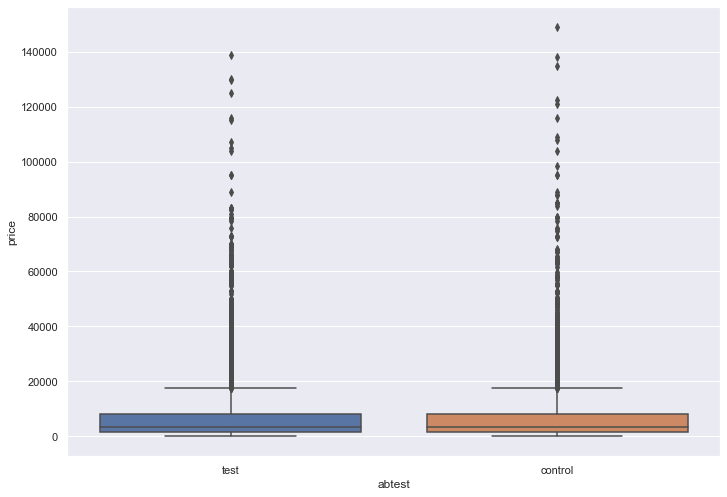

In [45]:
sns.boxplot(x= 'abtest',y='price',data=cars)

For every price value there is almost 50-50 distribution,
Does not affect price, so it is Insignificant

##### Variable vehicleType

In [46]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [47]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

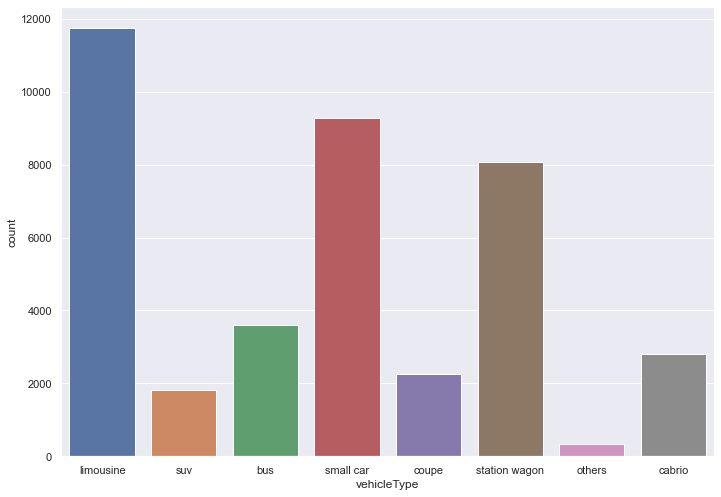

In [48]:
sns.countplot(x= 'vehicleType',data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

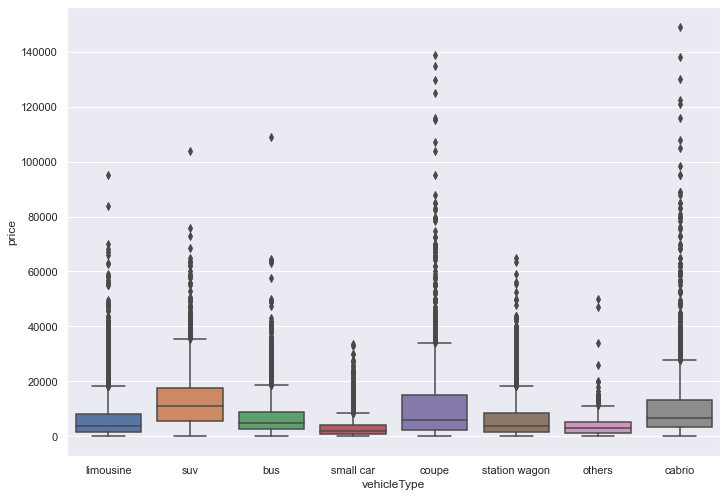

In [49]:
sns.boxplot(x= 'vehicleType',y='price',data=cars)

8 types- limousine, small cars and station wagons max freq, so we can say
vehicleType affects price 

##### Variable gearbox

In [50]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [51]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot:xlabel='gearbox', ylabel='count'>

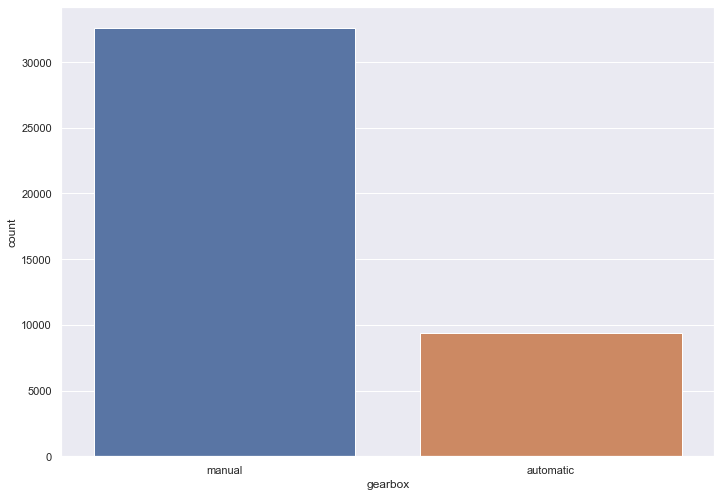

In [52]:
sns.countplot(x= 'gearbox',data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

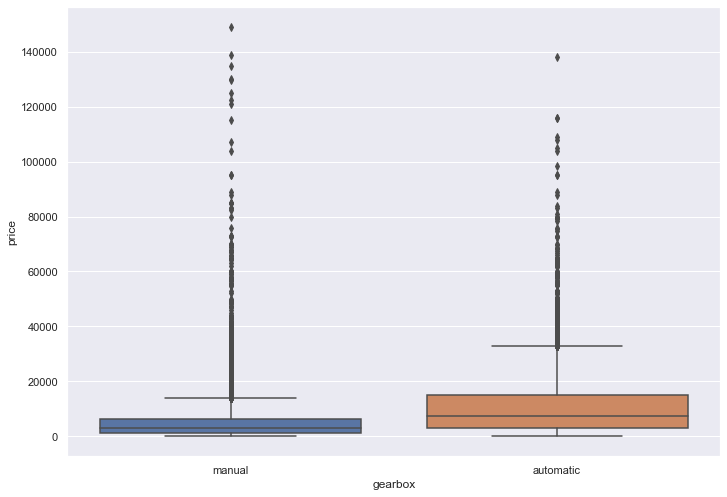

In [53]:
sns.boxplot(x= 'gearbox',y='price',data=cars)

gearbox affects price 

##### Variable model

In [54]:
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [55]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<AxesSubplot:xlabel='model', ylabel='count'>

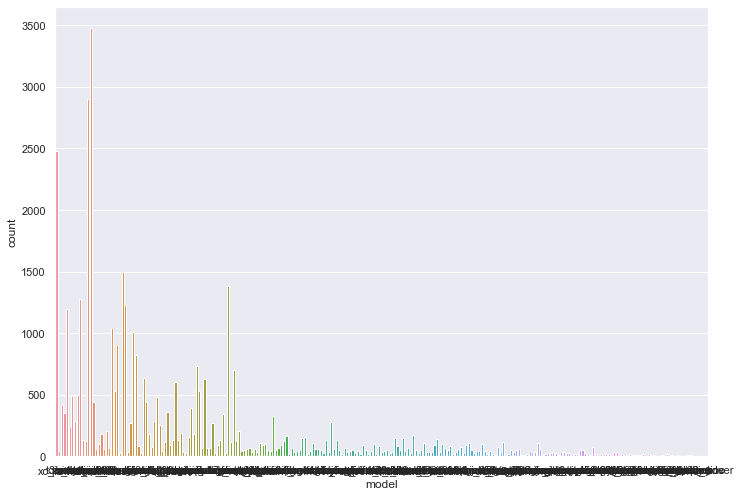

In [56]:
sns.countplot(x= 'model',data=cars)

<AxesSubplot:xlabel='model', ylabel='price'>

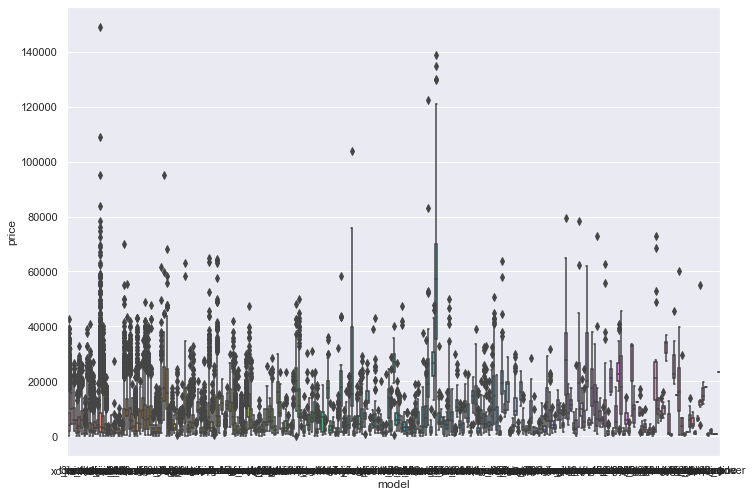

In [57]:
sns.boxplot(x= 'model',y='price',data=cars)

Cars are distributed over many models
Considered in modelling

##### Variable kilometer

In [58]:
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [59]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot:xlabel='kilometer', ylabel='price'>

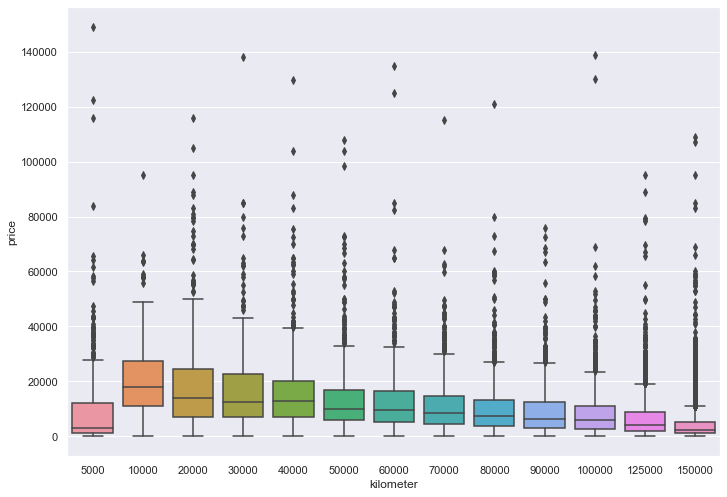

In [60]:
sns.boxplot(x= 'kilometer',y='price',data=cars)

In [61]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

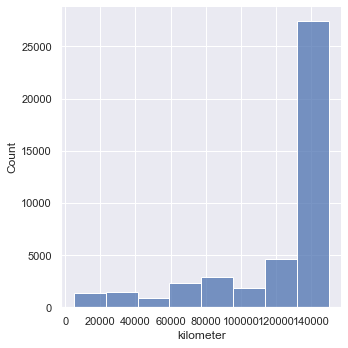

In [62]:
sns.displot(cars['kilometer'],bins=8 ,kde=False)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

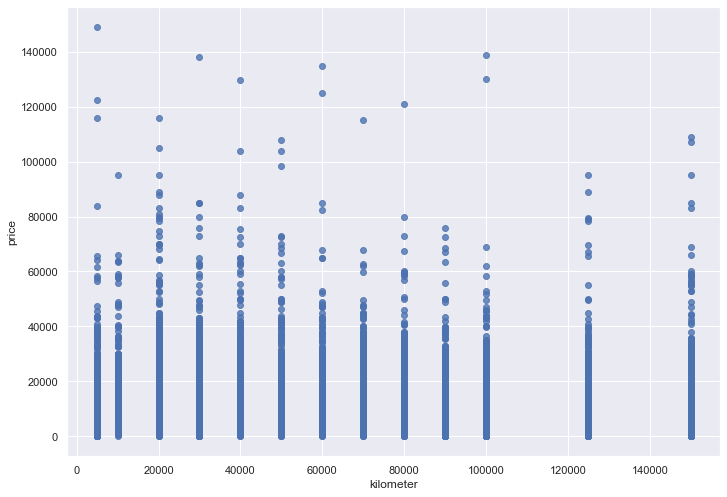

In [63]:
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)

Considered in modelling

##### Variable fuelType

In [64]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [65]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot:xlabel='fuelType', ylabel='count'>

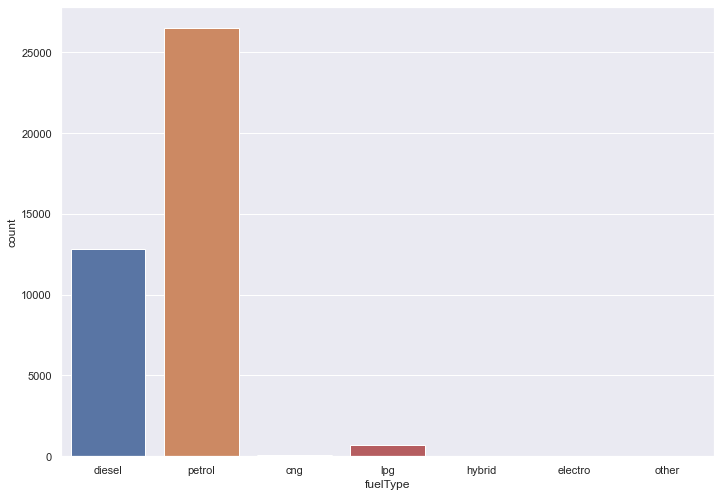

In [66]:
sns.countplot(x= 'fuelType',data=cars)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

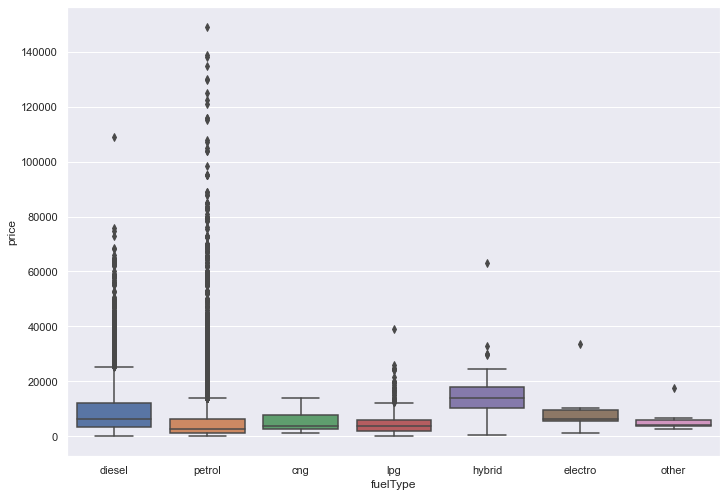

In [67]:
sns.boxplot(x= 'fuelType',y='price',data=cars)

fuelType affects price

##### Variable brand

In [68]:
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [69]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot:xlabel='brand', ylabel='count'>

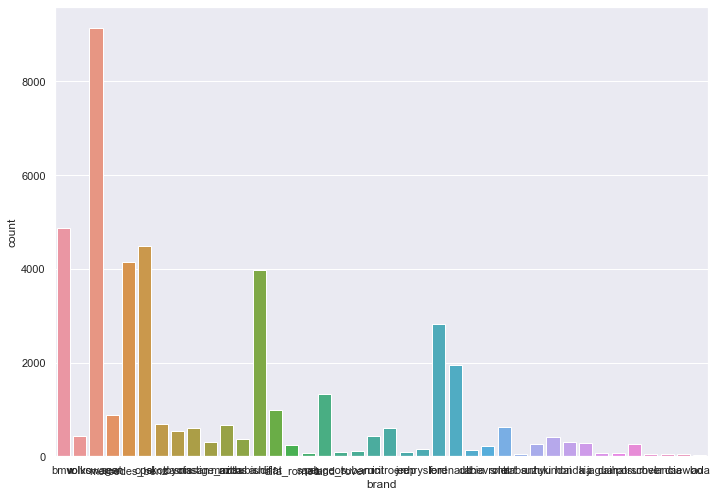

In [70]:
sns.countplot(x= 'brand',data=cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

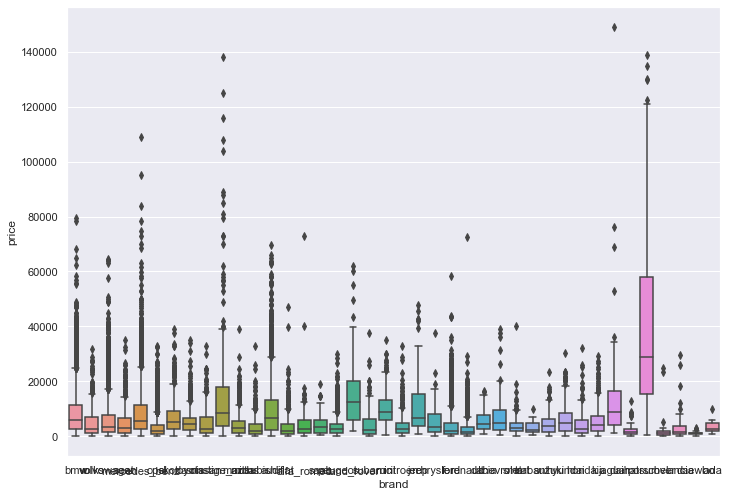

In [71]:
sns.boxplot(x= 'brand',y='price',data=cars)

Cars are distributed over many brands,
Considered for modelling 

##### Variable notRepairedDamage
yes- car is damaged but not rectified,
no- car was damaged but has been rectified

In [72]:
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [73]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

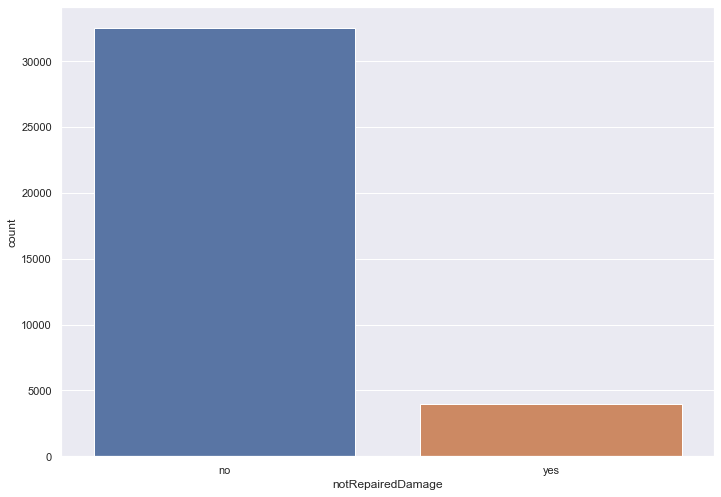

In [74]:
sns.countplot(x= 'notRepairedDamage',data=cars)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

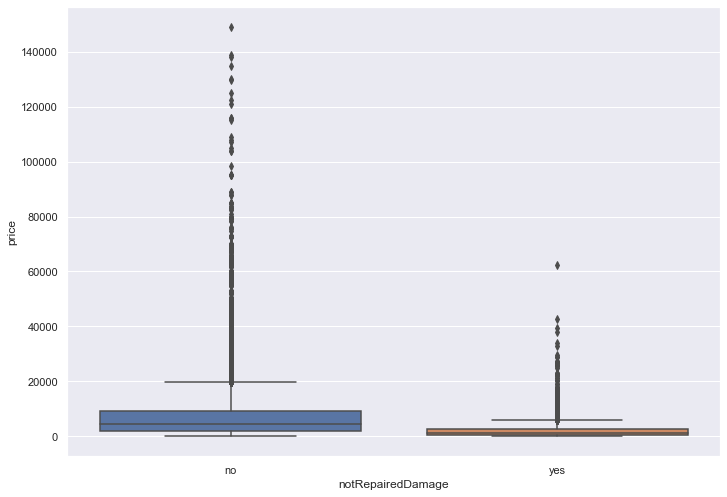

In [75]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)

As expected, the cars that require the damages to be repaired,
fall under lower price ranges

#### Removing insignificant variables

In [76]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

#### Correlation

In [77]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


Data is correlated but we only need correlation with price.

In [78]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

### Preparing the Model

**We are going to build a Linear Regression and Random Forest model on two sets of data.**
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 

#### OMITTING MISSING VALUES
In this set of data, if any data is missing we are going to eleminate whole raw.

In [79]:
cars_omit=cars.dropna(axis=0)

##### Converting categorical variables to dummy variables

In [80]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 

#### IMPORTING NECESSARY LIBRARIES

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### MODEL BUILDING WITH OMITTED DATA

##### Separating input and output features

In [82]:
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

##### Plotting the variable price

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

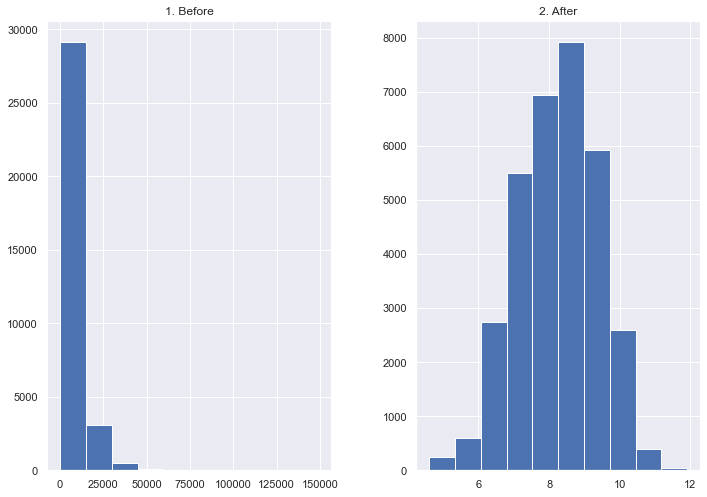

In [83]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

By this we can say log function will fit better to get results. Because range of price is vry huse so we are taking log.

##### Transforming price as a logarithmic value

In [84]:
y1 = np.log(y1)

##### Splitting data into test and train

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


#### BASELINE MODEL FOR OMITTED DATA

We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model.

##### finding the mean for test data value

In [86]:
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


##### Repeating same value till length of test data

In [87]:
base_pred = np.repeat(base_pred, len(y_test))

##### finding the RMSE

In [88]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1274483657478247


#### LINEAR REGRESSION WITH OMITTED DATA

##### Setting intercept as true

In [89]:
lgr=LinearRegression(fit_intercept=True)

##### Model

In [90]:
model_lin1=lgr.fit(X_train,y_train)

##### Predicting model on test set

In [91]:
cars_predictions_lin1 = lgr.predict(X_test)

##### Computing MSE and RMSE

In [92]:
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513842


##### R squared value
It tells you how good your model able to explain the variability in y.

In [93]:
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649242 0.7800936978183914


##### Regression diagnostics- Residual plot analysis
Difference between your predicted value and actual value.

<AxesSubplot:ylabel='price'>

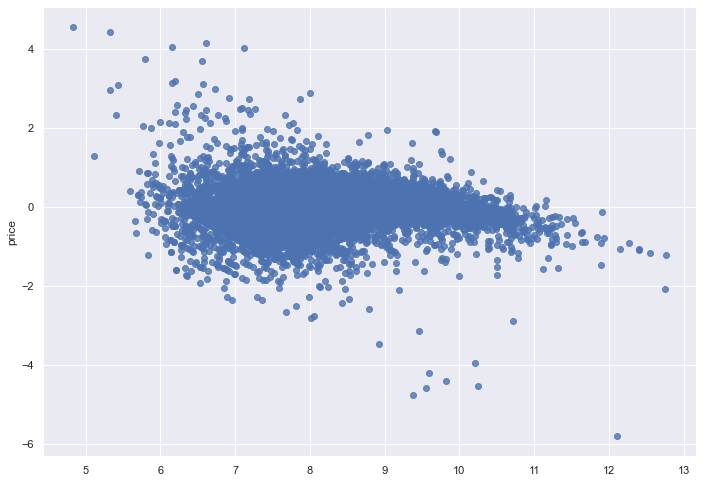

In [94]:
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)

In [95]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

#### RANDOM FOREST WITH OMITTED DATA

##### Model parameters

In [96]:
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

##### Model

In [97]:
model_rf1=rf.fit(X_train,y_train)

##### Predicting model on test set

In [98]:
cars_predictions_rf1 = rf.predict(X_test)

##### Computing MSE and RMSE

In [99]:
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360731285459596


##### R squared value

In [100]:
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   

0.8504021581003494 0.9202493209944781


#### MODEL BUILDING WITH IMPUTED DATA
In this set we are not droping na data, we are filling them with median value.

In [101]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

##### Converting categorical variables to dummy variables

In [102]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

#### MODEL BUILDING WITH IMPUTED DATA


##### Separating input and output feature

In [103]:
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

##### Plotting the variable price

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

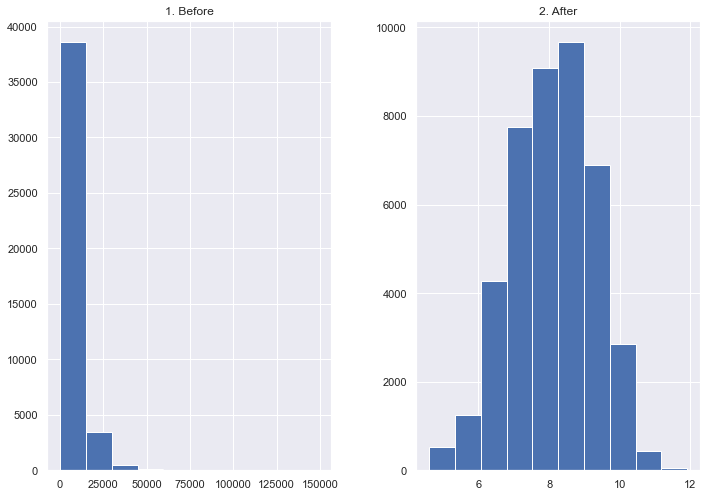

In [104]:
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

##### Transforming price as a logarithmic value

In [105]:
y2 = np.log(y2)

##### Splitting data into test and train

In [106]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


#### BASELINE MODEL FOR IMPUTED DATA

**We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model**

##### finding the mean for test data value

In [107]:
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


##### Repeating same value till length of test data

In [108]:
base_pred = np.repeat(base_pred, len(y_test1))

##### finding the RMSE

In [109]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


#### LINEAR REGRESSION WITH IMPUTED DATA


##### Setting intercept as true

In [110]:
lgr2=LinearRegression(fit_intercept=True)

##### Model

In [111]:
model_lin2=lgr2.fit(X_train1,y_train1)

##### Predicting model on test set

In [112]:
cars_predictions_lin2 = lgr2.predict(X_test1)

##### Computing MSE and RMSE

In [113]:
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231294


##### R squared value

In [114]:
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.7023339008631186 0.7071658736894363


#### RANDOM FOREST WITH IMPUTED DATA

##### Model parameters

In [115]:
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

##### Model

In [116]:
model_rf2=rf2.fit(X_train1,y_train1)

##### Predicting model on test set

In [117]:
cars_predictions_rf2 = rf2.predict(X_test1)

##### Computing MSE and RMSE

In [118]:
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.49431499888272407


##### R squared value

In [119]:
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)                            

0.8269957490244799 0.9024288265946934


#### Final output


In [120]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183914
R squared value for test from Linear Regression=  0.7658615091649242
R squared value for train from Random Forest=  0.9202493209944781
R squared value for test from Random Forest=  0.8504021581003494
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513842
RMSE value for test from Random Forest=  0.4360731285459596



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894363
R squared value for test from Linear Regression=  0.7023339008631186
R squared value for train from Random Forest=  0.9024288265946934
R squared value for test from Random Forest=  0.8269957490244799
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for te

#### END OF SCRIPT